In [70]:
import pandas
from time import time
import numpy as np
import matplotlib
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns

### Loading the Dataframe

In [71]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kdd_data_10percent = pd.read_csv("kddcup.data_10_percent", header=None, names = col_names)

In [72]:
kdd_data_10percent.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate    label  
0                       0.0  normal.  
1                       0.0  normal.  
2                       0.0  normal.  
3                       0.0  normal.  
4                       0.0  normal.  

[5 rows x 42 columns]

In [73]:
kdd_data_10percent.describe()

duration     src_bytes     dst_bytes           land  \
count  494021.000000  4.940210e+05  4.940210e+05  494021.000000   
mean       47.979302  3.025610e+03  8.685324e+02       0.000045   
std       707.746472  9.882181e+05  3.304000e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494021.000000  494021.000000  494021.000000      494021.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134805       0.005510       0.782103           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      30.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  494021.000000    494021.000000  ...   494021.000000   
mean        0.148247         0.010212  ...      232.470778   
std         0.355345         1.798326  ...       64.745380   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...      255.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         0.000000         0.000000  ...      255.000000   
max         1.000000       884.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       494021.000000           494021.000000           494021.000000   
mean           188.665670                0.753780                0.030906   
std            106.040437                0.410781                0.109259   
min              0.000000                0.000000                0.000000   
25%             46.000000                0.410000                0.000000   
50%            255.000000                1.000000                0.000000   
75%            255.000000                1.000000                0.040000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                494021.000000                494021.000000   
mean                      0.601935                     0.006684   
std                       0.481309                     0.042133   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       1.000000                     0.000000   
75%                       1.000000                     0.000000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         494021.000000             494021.000000         494021.000000   
mean               0.176754                  0.176443              0.058118   
std                0.380593                  0.380919              0.230590   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             494021.000000  
mean                   0.057412  
std                    0.230140  
min                    0.000000  
25

In [74]:
kdd_data_10percent.shape

(494021, 42)

In [75]:
kdd_data_10percent.drop_duplicates()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                   9   
1                    0       0    0  ...                  19   
2                    0       0    0  ...                  29   
3                    0       0    0  ...                  39   
4                    0       0    0  ...                  49   
...                ...     ...  ...  ...                 ...   
494016               0       0    0  ...                 255   
494017               0       0    0  ...                 255   
494018               0       0    0  ...                 255   
494019               0       0    0  ...                 255   
494020               0       0    0  ...                 255   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                          1.0                     0.0   
1                          1.0                     0.0   
2                          1.0                     0.0   
3                          1.0                     0.0   
4                          1.0                     0.0   
...                        ...                     ...   
494016                     1.0                     0.0   
494017                     1.0                     0.0   
494018                     1.0                     0.0   
494019                     1.0                     0.0   
494020                     1.0                     0.0   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.11                         0.00   
1                              0.05                         0.00   
2                              0.03                         0.00   
3                              0.03                         0.00   
4                              0.02                         0.00   
...                             ...                          ...   
494016                         0.01                         0.05   
494017                         0.17                         0.05   
494018                         0.06                         0.05   
494019                         0.04                         0.05   
494020                         0.17                         0.05   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                   0.0   
1                       0.00                      0.00                   0.0   
2                       0.00                      0.00                   0.0   
3                       0.00                      0.00                   0.0   
4                       0.00                      0.00                   0.0   
...                      ...                       ...                   ...   
494016                  0.00                      0.01                   0.0   
494017                  0.00                      0.01                   0.0   
494018                  0.06                      0.01                   0.0   
494019                  

In [76]:
kdd_data_10percent.dropna()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                   9   
1                    0       0    0  ...                  19   
2                    0       0    0  ...                  29   
3                    0       0    0  ...                  39   
4                    0       0    0  ...                  49   
...                ...     ...  ...  ...                 ...   
494016               0       0    0  ...                 255   
494017               0       0    0  ...                 255   
494018               0       0    0  ...                 255   
494019               0       0    0  ...                 255   
494020               0       0    0  ...                 255   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                          1.0                     0.0   
1                          1.0                     0.0   
2                          1.0                     0.0   
3                          1.0                     0.0   
4                          1.0                     0.0   
...                        ...                     ...   
494016                     1.0                     0.0   
494017                     1.0                     0.0   
494018                     1.0                     0.0   
494019                     1.0                     0.0   
494020                     1.0                     0.0   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.11                         0.00   
1                              0.05                         0.00   
2                              0.03                         0.00   
3                              0.03                         0.00   
4                              0.02                         0.00   
...                             ...                          ...   
494016                         0.01                         0.05   
494017                         0.17                         0.05   
494018                         0.06                         0.05   
494019                         0.04                         0.05   
494020                         0.17                         0.05   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                   0.0   
1                       0.00                      0.00                   0.0   
2                       0.00                      0.00                   0.0   
3                       0.00                      0.00                   0.0   
4                       0.00                      0.00                   0.0   
...                      ...                       ...                   ...   
494016                  0.00                      0.01                   0.0   
494017                  0.00                      0.01                   0.0   
494018                  0.06                      0.01                   0.0   
494019                  

## Identifying categorical features

In [79]:
for col_name in kdd_data_10percent.columns:
    if kdd_data_10percent[col_name].dtypes == 'object' :
        print("Feature '{}' has {} categories".format(col_name, len(kdd_data_10percent[col_name].unique())))

Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [80]:
kdd_data_10percent['protocol_type'] = kdd_data_10percent['protocol_type'].astype('category')
kdd_data_10percent['service'] = kdd_data_10percent['service'].astype('category')
kdd_data_10percent['flag'] = kdd_data_10percent['flag'].astype('category')

In [81]:
category_col = kdd_data_10percent.select_dtypes(['category']).columns
kdd_data_10percent[category_col] = kdd_data_10percent[category_col].apply(lambda x: x.cat.codes)

### Label Encoder

In [43]:
encoder = preprocessing.LabelEncoder()

In [82]:
kdd_data_10percent.protocol_type = encoder.fit_transform(kdd_data_10percent["protocol_type"])
kdd_data_10percent.service = encoder.fit_transform(kdd_data_10percent["service"])
kdd_data_10percent.flag = encoder.fit_transform(kdd_data_10percent["flag"])

In [83]:
kdd_data_10percent['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

### Min-Max Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(kdd_data_10percent.copy().drop('label', 1))

df_rescaled = pd.DataFrame(data=scaled_data, columns=col_names[:41])

In [85]:
df_rescaled.head(5)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
0       0.0            0.5  0.338462   0.9  2.610418e-07   0.001057   0.0   
1       0.0            0.5  0.338462   0.9  3.446905e-07   0.000094   0.0   
2       0.0            0.5  0.338462   0.9  3.389216e-07   0.000259   0.0   
3       0.0            0.5  0.338462   0.9  3.158461e-07   0.000259   0.0   
4       0.0            0.5  0.338462   0.9  3.129617e-07   0.000394   0.0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0             0.0     0.0  0.0  ...        0.035294            0.035294   
1             0.0     0.0  0.0  ...        0.074510            0.074510   
2             0.0     0.0  0.0  ...        0.113725            0.113725   
3             0.0     0.0  0.0  ...        0.152941            0.152941   
4             0.0     0.0  0.0  ...        0.192157            0.192157   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 41 columns]

In [86]:
X = df_rescaled.copy().astype(float)
y = kdd_data_10percent['label'].copy()

In [87]:
X.head()

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
0       0.0            0.5  0.338462   0.9  2.610418e-07   0.001057   0.0   
1       0.0            0.5  0.338462   0.9  3.446905e-07   0.000094   0.0   
2       0.0            0.5  0.338462   0.9  3.389216e-07   0.000259   0.0   
3       0.0            0.5  0.338462   0.9  3.158461e-07   0.000259   0.0   
4       0.0            0.5  0.338462   0.9  3.129617e-07   0.000394   0.0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0             0.0     0.0  0.0  ...        0.035294            0.035294   
1             0.0     0.0  0.0  ...        0.074510            0.074510   
2             0.0     0.0  0.0  ...        0.113725            0.113725   
3             0.0     0.0  0.0  ...        0.152941            0.152941   
4             0.0     0.0  0.0  ...        0.192157            0.192157   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 41 columns]

In [88]:
y.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

### Histogram to see the data distribution

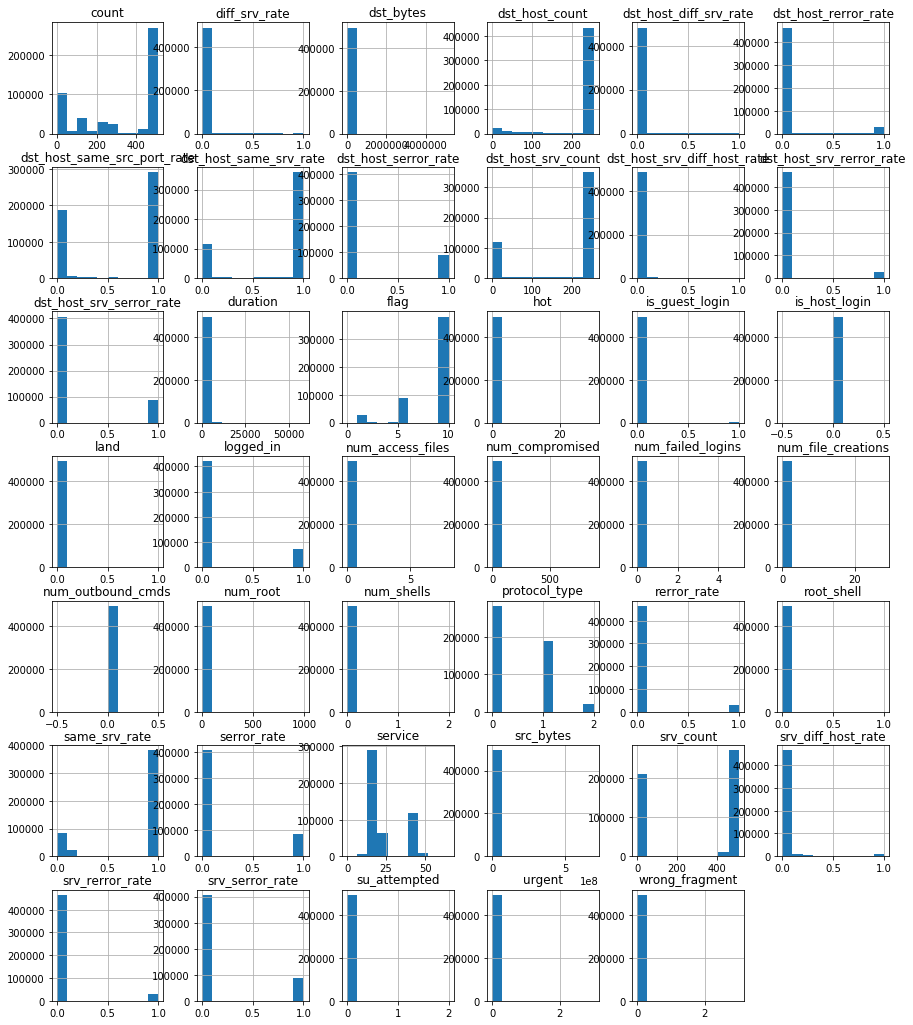

In [89]:
kdd_data_10percent.hist(figsize=(15,18))
plt.show()

### Correlation Matrix

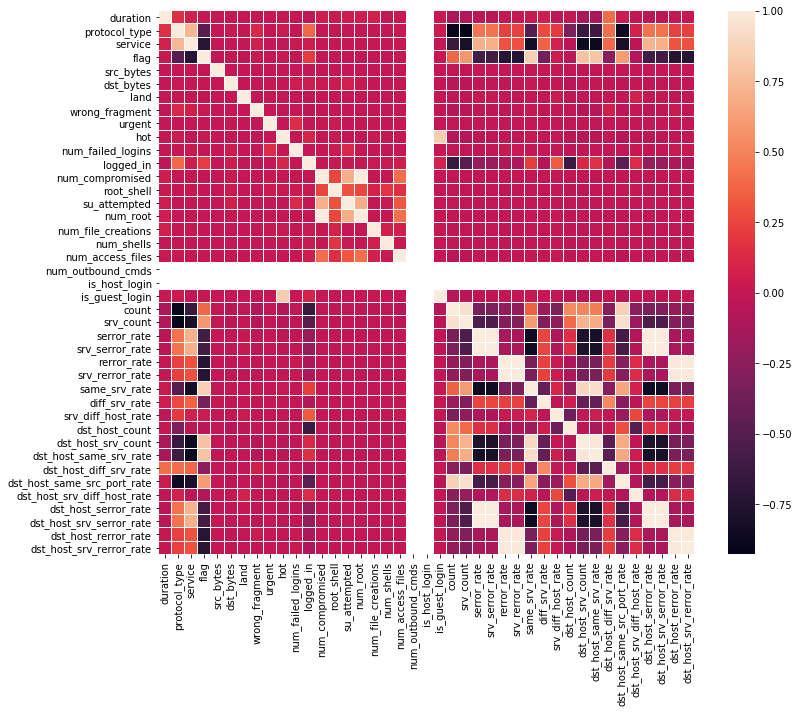

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(kdd_data_10percent.corr(),linewidths=.01)

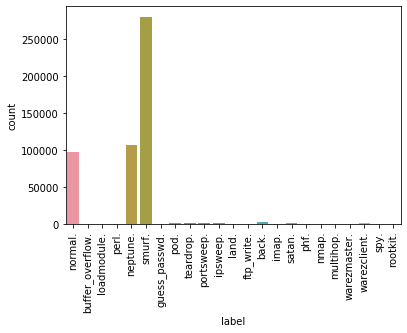

In [90]:
plt.xticks(rotation=90)
sns.countplot(y)

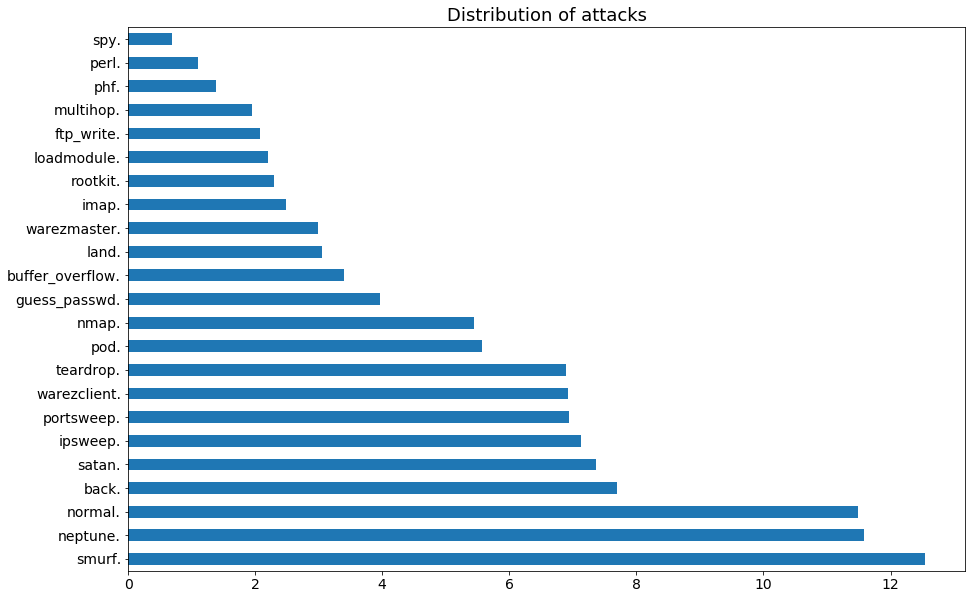

In [92]:
plt.clf()
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'})
plt.title('Distribution of attacks')
kdd_data_10percent['label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

## Feature Selection

Classifier trained in 2.284 seconds.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


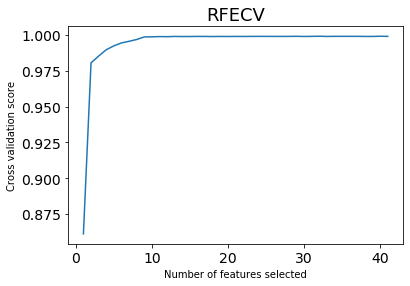

In [95]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import sklearn.tree as tree

X_train_rfecv, X_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(X, y, train_size = 0.75)

model = tree.DecisionTreeClassifier()
t0 = time()
model.fit(X_train_rfecv, y_train_rfecv)
tt = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

rfecv_kdd_data_10percent = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
rfecv_kdd_data_10percent.fit(X_test_rfecv, y_test_rfecv)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.title('RFECV')
plt.plot(range(1, len(rfecv_kdd_data_10percent.grid_scores_) + 1), rfecv_DoS.grid_scores_)
plt.show()

### Selecting K Best features

In [96]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=13)
X_k_best = selector.fit_transform(X, y)

In [97]:
mask = selector.get_support()
new_features = list()

for bool, feature in zip(mask, col_names[:-1]):
    if bool:
        new_features.append(feature)
        
print("Features selected are \n \n {}".format(str(new_features)))

Features selected are 
 
 ['protocol_type', 'land', 'wrong_fragment', 'logged_in', 'root_shell', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']


In [98]:
X_k_best.shape

(494021, 13)

### Splitting data into training and testing data

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, train_size = 0.75)

In [100]:
y_test.shape

(123506,)

In [101]:
X_test.shape[0]+ X_train.shape[0]

494021

## K-Means

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


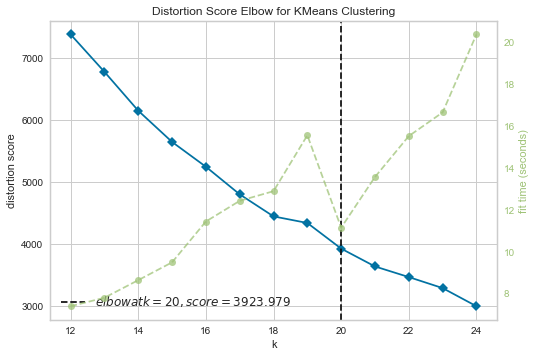

In [102]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(12,25))

visualizer.fit(X_k_best)
visualizer.show()


In [103]:
labels = y.copy()
k = 17
km = KMeans(n_clusters = k)

km.fit(X_k_best)

label_names = list(map(lambda x: pandas.Series([labels[i] for i in range(len(km.labels_)) if km.labels_[i]==x]), range(k)))
clusters = []
for i in range(len(label_names)):
    clusters.append(label_names[i].value_counts().index.tolist()[0])

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, hamming_loss, jaccard_similarity_score, matthews_corrcoef, zero_one_loss

pred = km.predict(X_k_best)

new_labels = [] 
for i in pred:                   
    new_labels.append(clusters[i])

accuracy_score = accuracy_score(labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))




Accuracy 97.796 %


Confusion Matrix: 

 [[     0      0      0      0      0      0      0      0      0      0
       0   2203      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0     30      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      8      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0     51
       0      2      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0     10
       0      2      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0     87
       0   1160      0      0      0      0  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Classification Scores: 

                   precision    recall  f1-score   support

           back.       0.00      0.00      0.00      2203
buffer_overflow.       0.00      0.00      0.00        30
      ftp_write.       0.00      0.00      0.00         8
   guess_passwd.       0.00      0.00      0.00        53
           imap.       0.00      0.00      0.00        12
        ipsweep.       0.00      0.00      0.00      1247
           land.       0.00      0.00      0.00        21
     loadmodule.       0.00      0.00      0.00         9
       multihop.       0.00      0.00      0.00         7
        neptune.       0.96      1.00      0.98    107201
           nmap.       0.00      0.00      0.00       231
         normal.       0.94      0.97      0.95     97278
           perl.       0.00      0.00      0.00         3
            phf.       0.00      0.00      0.00         4
            pod.       0.00      0.00      0.00       264
      portsweep.       0.00      0.00      

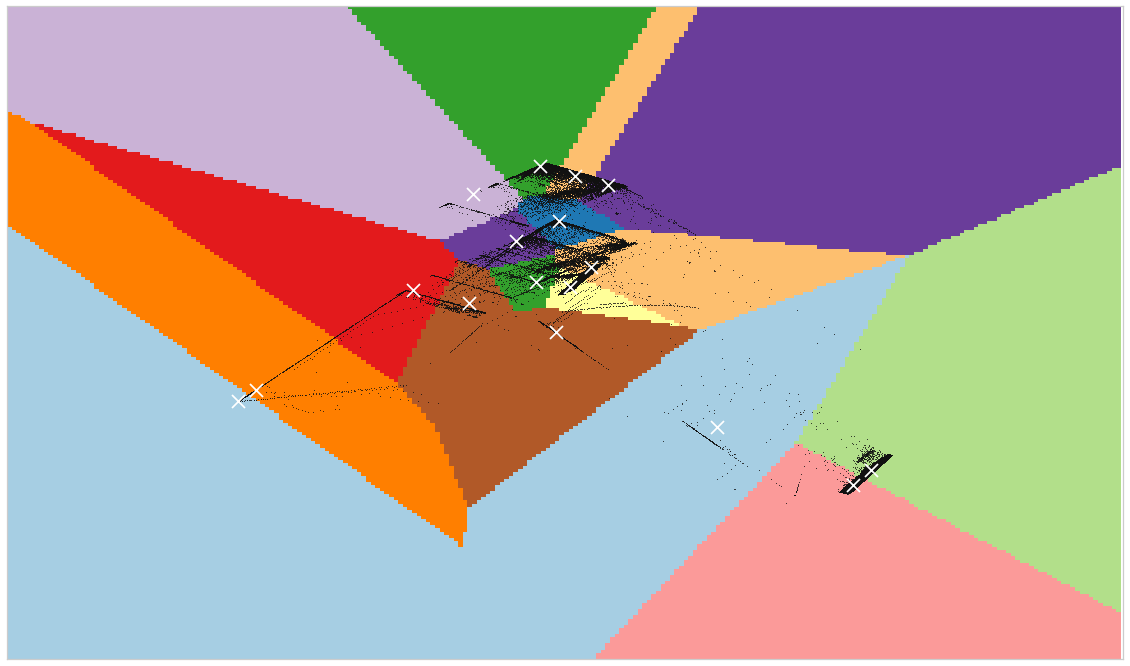

In [152]:
from sklearn.decomposition import PCA

#convert the data in 2D
kdd_data_10percent_2_features = PCA(n_components=2).fit_transform(X_k_best)
kmeans = KMeans(init='k-means++', n_clusters=17,)
kmeans.fit(kdd_data_10percent_2_features)

x_min = kdd_data_10percent_2_features[:, 0].min() - 1
x_max = kdd_data_10percent_2_features[:, 0].max() + 1
y_min = kdd_data_10percent_2_features[:, 1].min() - 1
y_max = kdd_data_10percent_2_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, 0.02))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = kmeans.cluster_centers_

Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired,aspect='auto', origin='lower')

plt.plot(kdd_data_10percent_2_features[:, 0], kdd_data_10percent_2_features[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.show()

### Decision Tree Classifier

In [44]:
import sklearn.tree as tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = tree.DecisionTreeClassifier()
# training the model
t0 = time()
model.fit(X_train, y_train)
tt = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt, 3)))



t0 = time()
pred = model.predict(X_test)
tt = time() - t0
print ("Predicted in {} seconds".format(round(tt,3)))

from sklearn.metrics import accuracy_score

acc = accuracy_score(pred, y_test)
print ("Accuracy is {}.".format(round(acc,4)))


classification_report = classification_report(y_test, pred)
print("\n\nClassification Scores: \n\n {}".format((classification_report)))


print("\n\nConfusion Matrix: \n")
pd.crosstab(y_test, pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Classifier trained in 1.148 seconds.
Predicted in 0.043 seconds
Accuracy is 0.9935.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Classification Scores: 

                   precision    recall  f1-score   support

           back.       0.54      0.30      0.39       521
buffer_overflow.       0.43      0.75      0.55         4
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       0.80      0.92      0.86        13
           imap.       1.00      1.00      1.00         4
        ipsweep.       0.77      0.79      0.78       270
           land.       1.00      1.00      1.00         6
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00     27018
           nmap.       0.70      0.73      0.71        62
         normal.       0.98      0.99      0.98     24151
           perl.       0.00      0.00      0.00         0
            phf.       1.00      1.00      1.00         1
            pod.       1.00      0.97      0.99        76
      portsweep.       0.97      0.95      

Predicted attacks  back.  buffer_overflow.  ftp_write.  guess_passwd.  imap.  \
Actual attacks                                                                 
back.                158                 0           0              0      0   
buffer_overflow.       0                 3           0              0      0   
ftp_write.             0                 0           0              0      0   
guess_passwd.          0                 0           0             12      0   
imap.                  0                 0           0              0      4   
ipsweep.               0                 0           0              0      0   
land.                  0                 0           0              0      0   
loadmodule.            0                 1           0              0      0   
multihop.              0                 1           0              0      0   
neptune.               0                 0           0              0      0   
nmap.                  0                 0           0              0      0   
normal.              134                 1           3              3      0   
phf.                   0                 0           0              0      0   
pod.                   0                 0           0              0      0   
portsweep.             0                 1           0              0      0   
satan.                 0                 0           0              0      0   
smurf.                 0                 0           0              0      0   
teardrop.              0                 0           0              0      0   
warezclient.           1                 0           0              0      0   
warezmaster.           0                 0           0              0      0   

Predicted attacks  ipsweep.  land.  loadmodule.  neptune.  nmap.  normal.  \
Actual attacks                                                              
back.                     0      0            0         0      0      363   
buffer_overflow.          0      0            0         0      0        1   
ftp_write.                0      0            0         0      0        1   
guess_passwd.             0      0            0         0      0        1   
imap.                     0      0            0         0      0        0   
ipsweep.                213      0            0         0     13       44   
land.                     0      6            0         0      0        0   
loadmodule.               0      0            0         0      0        0   
multihop.                 0      0            0         0      0        0   
neptune.                  0      0            0     27012      2        1   
nmap.                    13      0            0         0     45        4   
normal.                  51      0            1         2      4    23884   
phf.                      0      0            0         0      0        0   
pod.                      0      0            0         0      0        2   
portsweep.                1      0            0         0      0       10   
satan.                    0      0            0         1      0       11   
smurf.                    0      0            0         0      0        1   
teardrop.                 0      0            0         0      0        0   
warezclient.              0      0            0         0      0       57   
warezmaster.              0      0            0         0      0        2   

Predicted attacks  perl.  phf.  pod.  portsweep.  satan.  smurf.  teardrop.  \
Actual attacks                                                                
back.                  0     0     0           0       0       0          0   
buffer_overflow.       0     0     0           0       0       0          0   
ftp_write.             0     0     0           0       0       0          0   
guess_passwd.          0     0     0           0       0       0          0   
imap.                  0     0     0           0       0       0      

In [127]:
class_names_tree = np.unique(y_train).tolist()
print(class_names_tree)

['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.', 'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.', 'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'teardrop.', 'warezclient.', 'warezmaster.']


In [100]:
import graphviz
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=new_features,
                         class_names=class_names_tree,  
                         filled=True, rounded=True,  
                         special_characters=True)  
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.237251 to fit



### MLP

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

mlp = MLPClassifier(alpha = 1)
t0 = time()
mlp.fit(X_train, y_train)
tt = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt, 3)))


t0 = time()
pred = mlp.predict(X_test)
tt = time() - t0
print ("Predicted in {} seconds".format(round(tt,3)))

acc = accuracy_score(pred, y_test)
print ("Accuracy is {}.".format(round(acc,4)))

classification_report = classification_report(y_test, pred)
print("\n\nClassification Scores: \n\n {}".format(classification_report))

print("\n\nConfusion Matrix: \n")
pd.crosstab(y_test, pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Classifier trained in 30.724 seconds.
Predicted in 0.168 seconds
Accuracy is 0.9786.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Classification Scores: 

                   precision    recall  f1-score   support

           back.       0.00      0.00      0.00       571
buffer_overflow.       0.00      0.00      0.00         6
      ftp_write.       0.00      0.00      0.00         3
   guess_passwd.       0.00      0.00      0.00        14
           imap.       0.00      0.00      0.00         5
        ipsweep.       0.00      0.00      0.00       323
           land.       0.00      0.00      0.00         4
       multihop.       0.00      0.00      0.00         4
        neptune.       0.97      1.00      0.98     26670
           nmap.       0.00      0.00      0.00        61
         normal.       0.93      0.98      0.96     24408
            pod.       0.00      0.00      0.00        59
      portsweep.       0.00      0.00      0.00       256
        rootkit.       0.00      0.00      0.00         2
          satan.       0.00      0.00      0.00       386
          smurf.       1.00      1.00      

Predicted attacks  neptune.  normal.  smurf.
Actual attacks                              
back.                     0      571       0
buffer_overflow.          0        6       0
ftp_write.                0        3       0
guess_passwd.            12        2       0
imap.                     4        1       0
ipsweep.                 18      305       0
land.                     4        0       0
multihop.                 0        4       0
neptune.              26670        0       0
nmap.                    35       25       1
normal.                 399    24005       4
pod.                     21       38       0
portsweep.               25      220      11
rootkit.                  1        1       0
satan.                  349       37       0
smurf.                    7       19   70185
spy.                      1        1       0
teardrop.                27      235       0
warezclient.              0      254       0
warezmaster.              0        5       0

### SVM

In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = svm.SVC()

t0 = time()
model.fit(X_train, y_train)
tt = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

t0 = time()
pred = model.predict(X_test)
tt = time() - t0
print ("Predicted in {} seconds".format(round(tt,3)))

from sklearn.metrics import accuracy_score

acc = accuracy_score(pred, y_test)
print ("Accuracy is {}.".format(round(acc,4)))

classification_report = classification_report(y_test, pred)
print("\n\nClassification Scores: \n\n {}".format(classification_report))


print("\n\nConfusion Matrix: \n")
pd.crosstab(y_test, pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Classifier trained in 156.996 seconds.
Predicted in 42.124 seconds
Accuracy is 0.9918.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Classification Scores: 

                   precision    recall  f1-score   support

           back.       0.00      0.00      0.00       545
buffer_overflow.       0.33      0.38      0.35         8
      ftp_write.       0.00      0.00      0.00         1
   guess_passwd.       0.00      0.00      0.00        17
           imap.       1.00      1.00      1.00         1
        ipsweep.       0.83      0.55      0.66       312
           land.       0.80      1.00      0.89         4
     loadmodule.       0.00      0.00      0.00         3
       multihop.       0.00      0.00      0.00         3
        neptune.       1.00      1.00      1.00     26893
           nmap.       0.97      0.47      0.63        60
         normal.       0.96      1.00      0.98     23954
            phf.       0.00      0.00      0.00         2
            pod.       1.00      1.00      1.00        62
      portsweep.       0.90      0.92      0.91       252
        rootkit.       0.00      0.00      

Predicted attacks  back.  buffer_overflow.  imap.  ipsweep.  land.  neptune.  \
Actual attacks                                                                 
back.                  0                 0      0         0      0         0   
buffer_overflow.       0                 3      0         0      0         0   
ftp_write.             0                 0      0         0      0         0   
guess_passwd.          0                 0      0         0      0         0   
imap.                  0                 0      1         0      0         0   
ipsweep.               0                 0      0       171      0         0   
land.                  0                 0      0         0      4         0   
loadmodule.            0                 2      0         0      0         0   
multihop.              0                 0      0         0      0         0   
neptune.               0                 0      0         0      0     26888   
nmap.                  0                 0      0        13      0         0   
normal.                0                 3      0         8      1         2   
phf.                   0                 0      0         0      0         0   
pod.                   0                 0      0         0      0         0   
portsweep.             0                 0      0         0      0         2   
rootkit.               0                 1      0         0      0         0   
satan.                 1                 0      0         0      0        15   
smurf.                 0                 0      0        13      0         0   
spy.                   0                 0      0         0      0         0   
teardrop.              0                 0      0         0      0         0   
warezclient.           0                 0      0         0      0         0   
warezmaster.           0                 0      0         0      0         0   

Predicted attacks  nmap.  normal.  pod.  portsweep.  satan.  smurf.  \
Actual attacks                                                        
back.                  0      544     0           0       0       0   
buffer_overflow.       0        1     0           0       0       0   
ftp_write.             0        1     0           0       0       0   
guess_passwd.          0       16     0           1       0       0   
imap.                  0        0     0           0       0       0   
ipsweep.               0      141     0           0       0       0   
land.                  0        0     0           0       0       0   
loadmodule.            0        1     0           0       0       0   
multihop.              0        2     0           1       0       0   
neptune.               1        4     0           0       0       0   
nmap.                 28       19     0           0       0       0   
normal.                0    23887     0          20       0       0   
phf.                   0        2     0           0       0       0   
pod.                   0        0    62           0       0       0   
portsweep.             0       17     0         233       0       0   
rootkit.               0        1     0           0       0       0   
satan.                 0       54     0           0     327       0   
smurf.                 0        0     0           0       0   70508   
spy.                   0        1     0           0       0       0   
teardrop.              0        2     0           0       0       0   
warezclient.           0       77     0           0       0       0   
warezmaster.           0        0     0           3       0       0   

Predicted attacks  teardrop.  warezclient.  
Actual attacks                              
back.                      0             1  
buffer_overflow.           0             4  
ftp_write.                 0             0  
guess_passwd.              0             0  
imap.                      0             0  
ipsweep.                   0             0  
land.         

In [57]:
from sklearn.preprocessing import label_binarize
from sklearn import svm

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=np.unique(y).tolist())
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.75)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.SVC())
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 13 is present in all training examples.
  str(classes[c]))


['back.',
 'buffer_overflow.',
 'ftp_write.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'land.',
 'loadmodule.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'perl.',
 'phf.',
 'pod.',
 'portsweep.',
 'rootkit.',
 'satan.',
 'smurf.',
 'spy.',
 'teardrop.',
 'warezclient.',
 'warezmaster.']

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


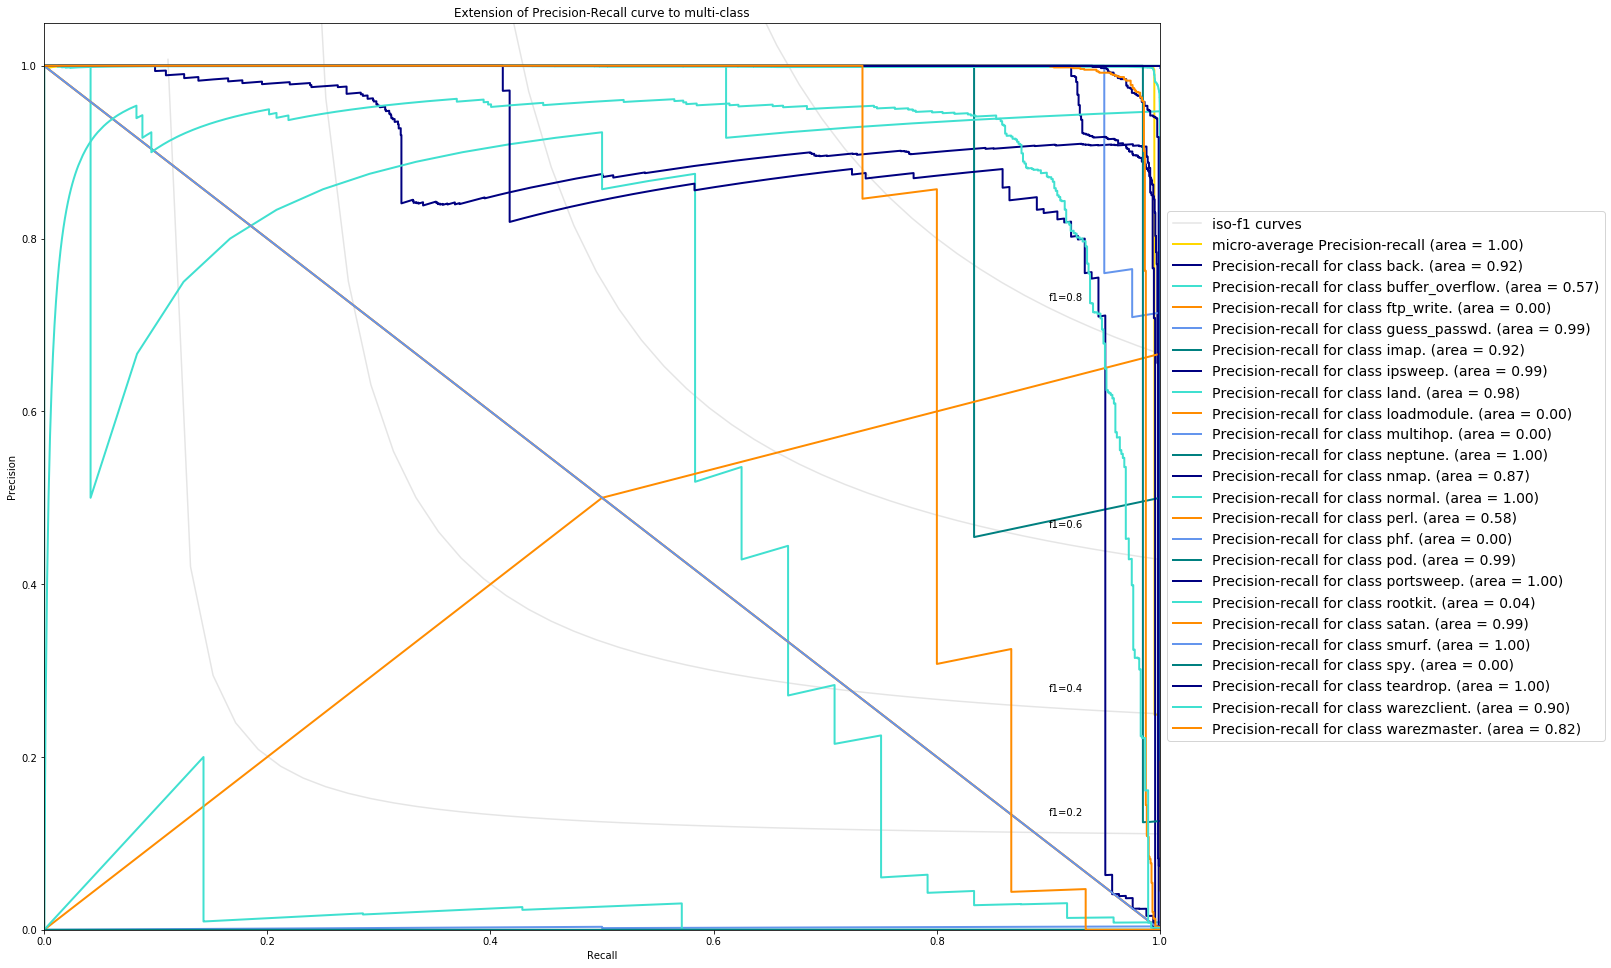

In [64]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    yf = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[yf >= 0], yf[yf >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, yf[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.set_size_inches(20,20)
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc="center left", prop=dict(size=14), bbox_to_anchor = (1,0.5))


plt.show()


In [ ]:
# References :-
# sklearn documentation code